In [1]:
import tensorflow as tf
print(tf.__version__)


2.3.1


In [2]:
string=tf.Variable("this is a string",tf.string)
nunber=tf.Variable(324,tf.int16)
floating=tf.Variable(3.567,tf.float64)

In [3]:
print(string)
print(nunber)
print(floating)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.567>


In [4]:
rank1_tensor=tf.Variable(['Test'],tf.string)
rank2_tensor=tf.Variable([['Test','Ok'],['Test','Yes']],tf.string)

In [5]:
print(tf.rank(rank1_tensor))

tf.Tensor(1, shape=(), dtype=int32)


In [6]:
print(tf.rank(rank2_tensor))

tf.Tensor(2, shape=(), dtype=int32)


In [7]:
tensor1=tf.ones([1,2,3])
tensor2=tf.reshape(tensor1,[2,3,1])
tensor3=tf.reshape(tensor2,[3,-1])

In [8]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [9]:
matrix=[[1,2,3,4,5],
        [6,7,8,9,10],
        [11,12,13,14,15],
        [16,17,18,19,20]]

In [10]:
tensor=tf.Variable(matrix,dtype=tf.int32)

In [11]:
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [12]:
three=tensor[0,2]
print(three)

tf.Tensor(3, shape=(), dtype=int32)


In [13]:
row1=tensor[0]
print(row1)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [14]:
column1=tensor[:,0]
print(column1)

tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)


In [15]:
row2_and_4=tensor[1::2]
print(row2_and_4)

tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)


In [16]:
column1_in_row2_and_3=tensor[1:3,0]
print(column1_in_row2_and_3)

tf.Tensor([ 6 11], shape=(2,), dtype=int32)


In [17]:
from __future__ import absolute_import,division,print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
from six.moves import urllib


import tensorflow.compat.v2.feature_column as  fc

import tensorflow as tf

In [18]:
dftrain=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
dftrain.head()


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [19]:
dftest.tail()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y
263,1,male,26.0,0,0,30.0000,First,C,Cherbourg,y


In [20]:
y_train=dftrain.pop('survived')
y_eval=dftest.pop('survived')

In [21]:
y_train.tail()

622    0
623    0
624    1
625    0
626    0
Name: survived, dtype: int64

In [22]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

In [23]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [24]:
dftest.describe()

,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


In [25]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [26]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 264 non-null    object 
 1   age                 264 non-null    float64
 2   n_siblings_spouses  264 non-null    int64  
 3   parch               264 non-null    int64  
 4   fare                264 non-null    float64
 5   class               264 non-null    object 
 6   deck                264 non-null    object 
 7   embark_town         264 non-null    object 
 8   alone               264 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 18.7+ KB


In [27]:
dftrain.shape

(627, 9)

In [28]:
dftest.shape

(264, 9)

In [29]:
dftrain.isna().sum()

sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [30]:
dftest.isna().sum()

sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

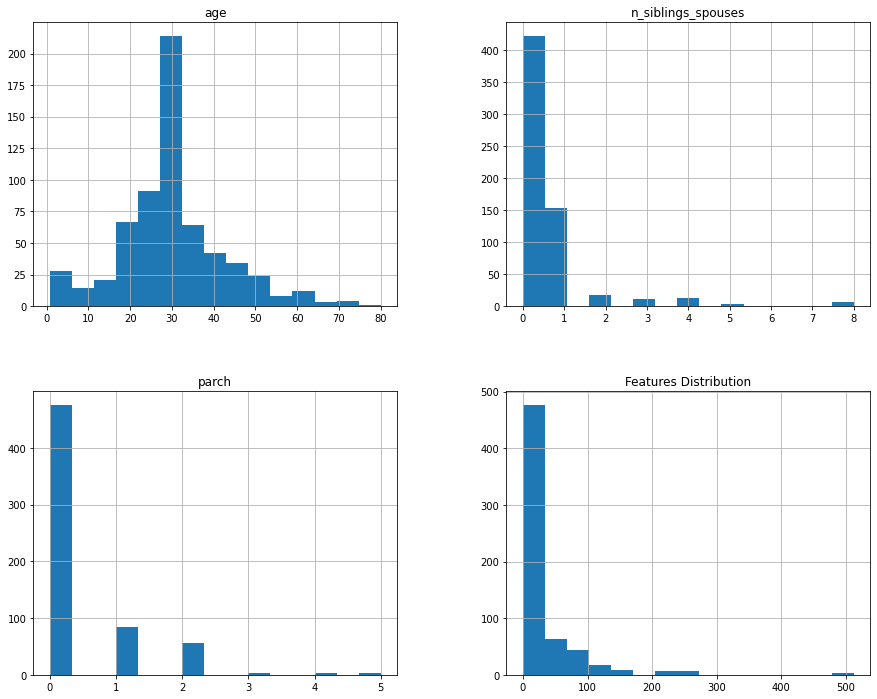

In [31]:
dftrain.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

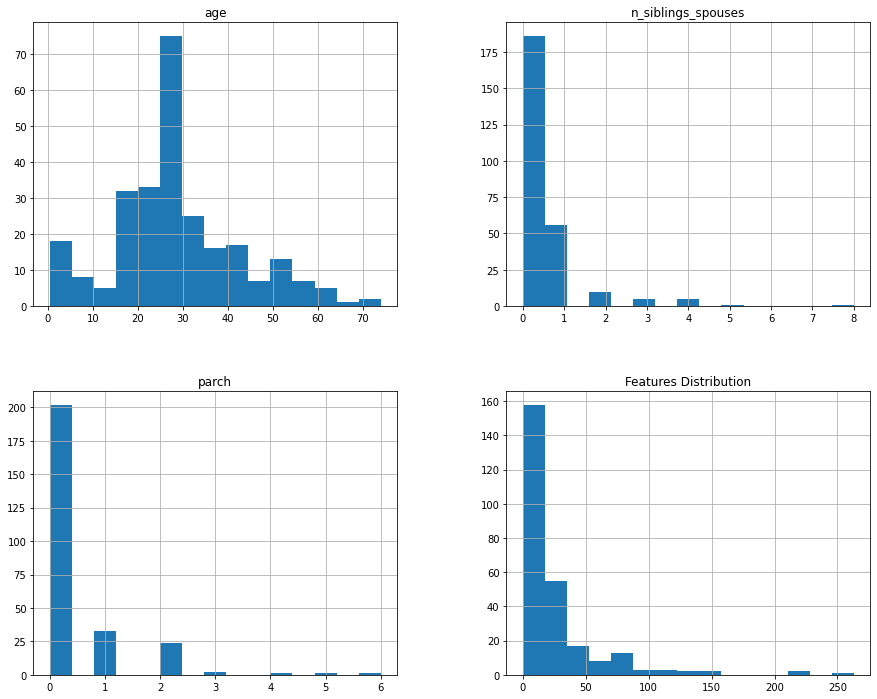

In [32]:
dftest.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

<AxesSubplot:>

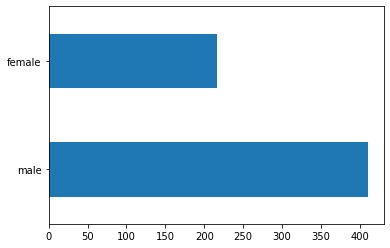

In [33]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

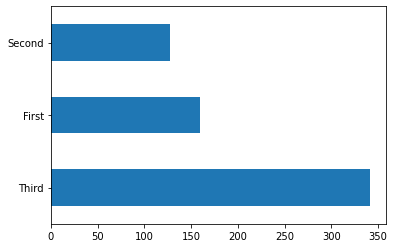

In [34]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survie')

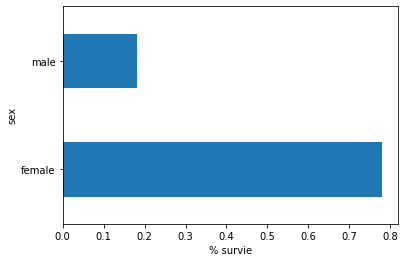

In [35]:
pd.concat([dftrain,y_train],
axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survie')

In [36]:
dftrain.columns

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [37]:
categorical_columns=['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
       'embark_town', 'alone']
numerical_columns=['age','fare']

In [38]:
feature_columns=[]
for feature_names in categorical_columns:
    vocabulary=dftrain[feature_names].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_names,vocabulary))
    
for feature_names in numerical_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_names,dtype=tf.float32))
    
    
print(feature_columns)
    

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [39]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
    def input_function():
        ds=tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds=ds.shuffle(1000)
        ds=ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function


train_function_fn=make_input_fn(dftrain,y_train)
eval_input_fn=make_input_fn(dftest,y_eval,num_epochs=1,shuffle=False)
        

In [40]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpa0y4npfc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
linear_est.train(train_function_fn)
result=linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

0.75757575


INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa0y4npfc/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'Predicted probabilities'}, ylabel='Frequency'>

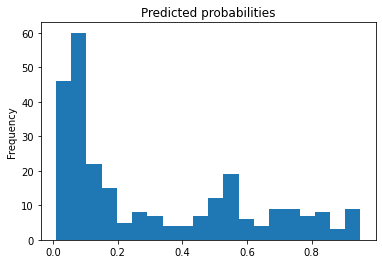

In [42]:
pred_dicts=list(linear_est.predict(eval_input_fn))
probs=pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist',bins=20,title='Predicted probabilities')

In [43]:
### Classification

In [44]:
csv_columns_names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
species=['Setosa','Versicolor','Virginica']

In [45]:
train_path=tf.keras.utils.get_file("iris_training.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path=tf.keras.utils.get_file("iris_test.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

In [46]:
train=pd.read_csv(train_path,names=csv_columns_names,header=0)
test=pd.read_csv(test_path,names=csv_columns_names,header=0)

In [47]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [48]:
test.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
25,6.1,3.0,4.6,1.4,1
26,5.2,4.1,1.5,0.1,0
27,6.7,3.1,4.7,1.5,1
28,6.7,3.3,5.7,2.5,2
29,6.4,2.9,4.3,1.3,1


In [49]:
train.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.845000,3.065000,3.739167,1.196667,1.000000
std,0.868578,0.427156,1.822100,0.782039,0.840168
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.075000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.425000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [50]:
test.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.836667,3.010000,3.836667,1.206667,1.000000
std,0.653628,0.463383,1.537459,0.694775,0.742781
min,4.300000,2.200000,1.100000,0.100000,0.000000
25%,5.500000,2.725000,2.300000,0.625000,0.250000
50%,5.750000,3.000000,4.250000,1.300000,1.000000
75%,6.300000,3.300000,4.900000,1.575000,1.750000
max,7.100000,4.200000,5.900000,2.500000,2.000000


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   120 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
 4   Species      120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  30 non-null     float64
 1   SepalWidth   30 non-null     float64
 2   PetalLength  30 non-null     float64
 3   PetalWidth   30 non-null     float64
 4   Species      30 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [53]:
train.shape

(120, 5)

In [54]:
test.shape

(30, 5)

In [55]:
train.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [56]:
test.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

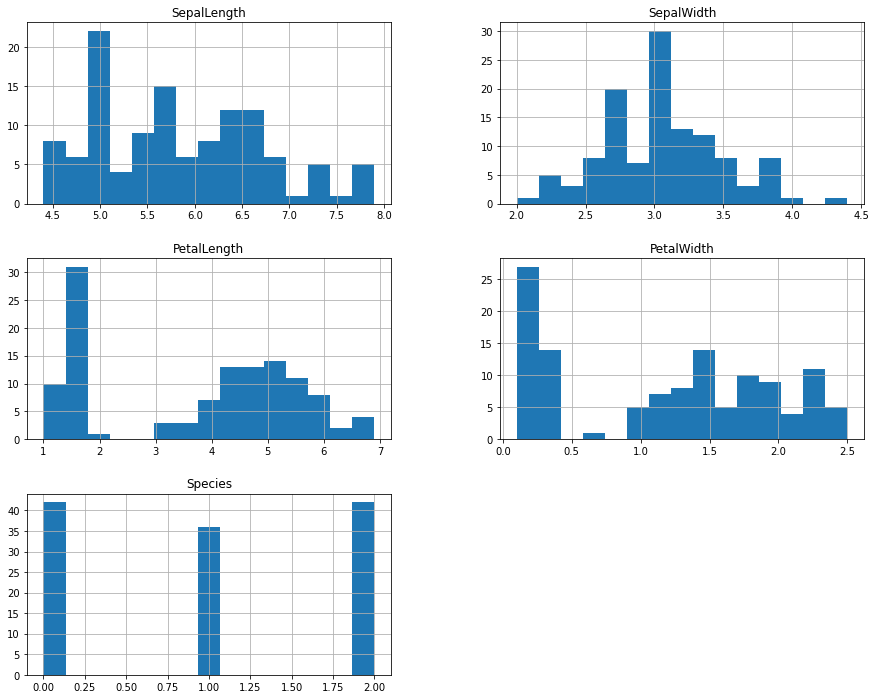

In [57]:
train.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

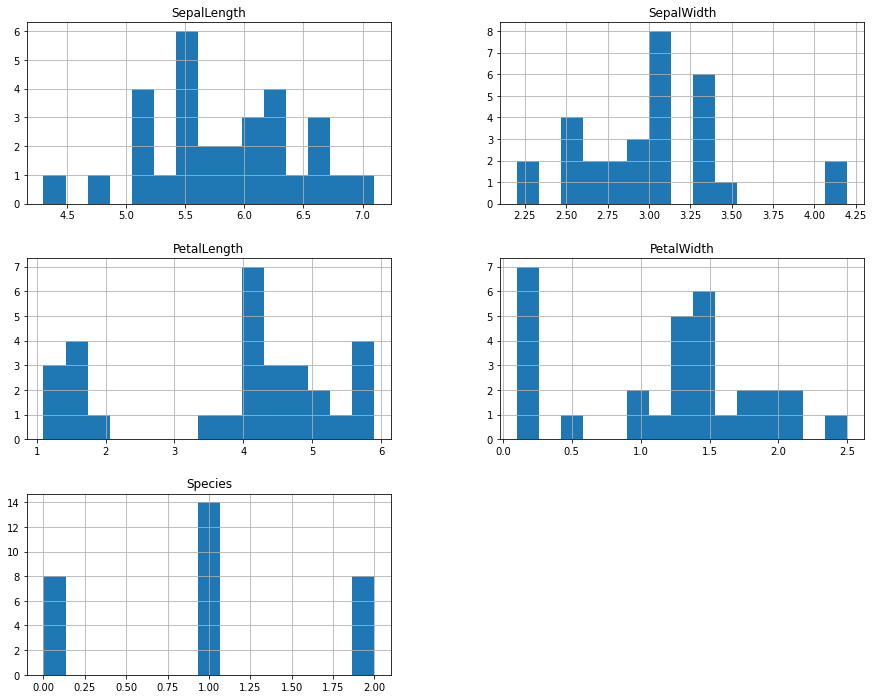

In [58]:
test.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [59]:
train_y=train.pop('Species')
test_y=test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [60]:
def input_fn(features,labels,training=True,batch_size=256):
    dataset=tf.data.Dataset.from_tensor_slices((dict(features),labels))
    
    if training:
        dataset=dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [61]:
my_feature_columns=[]
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [62]:
classifier=tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30,10],
    n_classes=3
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0ubnbvfc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
classifier.train(
    input_fn=lambda:input_fn(train,train_y,training=True),
    steps=5000
)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0ubnbvfc/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 2.2120318, step = 0
INFO

In [64]:
eval_results=classifier.evaluate(
    input_fn=lambda:input_fn(test,test_y,training=False))

print("\n test Set accuracy: {accuracy:0.3f}\n".format(**eval_results))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-02T14:46:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0ubnbvfc/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.16877s
INFO:tensorflow:Finished evaluation at 2021-01-02-14:46:45
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, averag

In [67]:
def input_fn(features,batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


features=['SepalLength','SepalWidth','PetalLength','PetalWidth']
predict={}


print("please type numeric values as prompted")

for feature in features:
    valid=True
    while valid:
        val=input(feature+": ")
        if not val.isdigit():valid=False
    predict[feature]=[float(val)]
    
    
predicition=classifier.predict(input_fn=lambda:input_fn(predict))
for pred_dict in predicition:
    class_id in pred_dict['class_ids'][0]
    probability=pred_dict['probabilities'][class_id]
    
    print('prediction is "{ }"  ({:.1f}%)'.format(
    Species[class_id],100*probability))



please type numeric values as prompted


SepalLength:  2.5
SepalWidth:  2.5
PetalLength:  2.5
PetalWidth:  2.5


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0ubnbvfc/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


NameError: name 'class_id' is not defined